In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
# Для запуска через Google Colab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1Lasj3QV50Fw-Dffh9cQPHjObxxTG0eXo'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 


downloaded.GetContentFile('data_ren.csv')  

# 1. Преобработка данных

In [63]:
df = pd.read_csv('data_ren.csv', sep=';') # Считывание даты
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

DATA_TYPE  POLICY_ID  ...  CLIENT_REGISTRATION_REGION  POLICY_PRICE_CHANGE
0     TRAIN          1  ...                    Тульская                -1.00
1     TRAIN          2  ...                      Москва                -0.05
2     TRAIN          3  ...                  Московская                -0.07
3     TRAIN          4  ...                      Москва                 0.05
4     TRAIN          5  ...               Ленинградская                 0.17

[5 rows x 30 columns]

In [6]:
list(df.columns)

['DATA_TYPE',
 'POLICY_ID',
 'POLICY_BEGIN_MONTH',
 'POLICY_END_MONTH',
 'POLICY_IS_RENEWED',
 'POLICY_SALES_CHANNEL',
 'POLICY_SALES_CHANNEL_GROUP',
 'POLICY_BRANCH',
 'POLICY_MIN_AGE',
 'POLICY_MIN_DRIVING_EXPERIENCE',
 'VEHICLE_MAKE',
 'VEHICLE_MODEL',
 'VEHICLE_ENGINE_POWER',
 'VEHICLE_IN_CREDIT',
 'VEHICLE_SUM_INSURED',
 'POLICY_INTERMEDIARY',
 'INSURER_GENDER',
 'POLICY_CLM_N',
 'POLICY_CLM_GLT_N',
 'POLICY_PRV_CLM_N',
 'POLICY_PRV_CLM_GLT_N',
 'CLIENT_HAS_DAGO',
 'CLIENT_HAS_OSAGO',
 'POLICY_COURT_SIGN',
 'CLAIM_AVG_ACC_ST_PRD',
 'POLICY_HAS_COMPLAINTS',
 'POLICY_YEARS_RENEWED_N',
 'POLICY_DEDUCT_VALUE',
 'CLIENT_REGISTRATION_REGION',
 'POLICY_PRICE_CHANGE']

In [0]:
df = pd.read_csv('data_ren.csv', sep=';') # Считывание даты
df.drop(columns='Unnamed: 0', inplace=True)
df['DATA_TYPE'] = df['DATA_TYPE'].apply(lambda x: x.strip(' ')) # Убираем пробел в конце для 'TEST '
df.loc[:, 'Date_Diff'] = list(df['POLICY_END_MONTH'] - df['POLICY_BEGIN_MONTH']) # Столбец разницы дат окончания и начала полисов

data_transoform = df.copy()
list_columns_dummies = []
#list_columns = set(df.columns) - set(['DATA_TYPE'])
list_columns = list(df.columns)
list_columns.remove('DATA_TYPE')  # Cписок названий всех столбцов


for name_column in list_columns:
    if not isinstance(df.loc[0, name_column], np.int64) and not isinstance(df.loc[0, name_column], np.float64):
        list_columns_dummies.append(name_column) # список названий столбцов с категориальными признаками
        
del df
        
data_transoform = pd.get_dummies(data_transoform, columns=list_columns_dummies) # все категориальные признаки представили в булеановом виде

data_train = data_transoform[data_transoform['DATA_TYPE'] == 'TRAIN']   # equal to df.loc[df.DATA_TYPE == 'TRAIN']
data_test = data_transoform[data_transoform['DATA_TYPE'] == 'TEST']

all_columns = data_transoform.columns
del data_transoform

columns_features = list(set(all_columns) - set(['POLICY_IS_RENEWED', 'DATA_TYPE', 'POLICY_ID']))
columns_features.sort()

X = data_train[columns_features]
y = np.array(data_train['POLICY_IS_RENEWED'])

del data_train

X = np.array(X)
                   
X_test_final = np.array(data_test[columns_features]) # Данные для финального теста
y_test_final = np.array(data_test['POLICY_IS_RENEWED'])

list_id = data_test['POLICY_ID']

del data_test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

# 2. Корреляции

In [0]:
df.iloc[0, :]

DATA_TYPE                             TRAIN
POLICY_ID                                 1
POLICY_BEGIN_MONTH                        1
POLICY_END_MONTH                          1
POLICY_IS_RENEWED                         1
POLICY_SALES_CHANNEL                     39
POLICY_SALES_CHANNEL_GROUP                1
POLICY_BRANCH                        Москва
POLICY_MIN_AGE                           51
POLICY_MIN_DRIVING_EXPERIENCE            12
VEHICLE_MAKE                     Land Rover
VEHICLE_MODEL                     Discovery
VEHICLE_ENGINE_POWER                    245
VEHICLE_IN_CREDIT                         0
VEHICLE_SUM_INSURED              1.2832e+06
POLICY_INTERMEDIARY                     856
INSURER_GENDER                            F
POLICY_CLM_N                              0
POLICY_CLM_GLT_N                          0
POLICY_PRV_CLM_N                          N
POLICY_PRV_CLM_GLT_N                      N
CLIENT_HAS_DAGO                           1
CLIENT_HAS_OSAGO                

In [0]:
data_corr = df.copy()
for col in list_columns_dummies:
    data_corr.loc[:, col] = data_corr[col].astype("category").cat.codes

data_corr = data_corr.loc[df.DATA_TYPE == 'TRAIN']
data_corr = data_corr[set(data_corr) - set(['DATA_TYPE'])]    

In [0]:
data_corr.loc[0, :]

POLICY_PRV_CLM_GLT_N                   6.0
POLICY_IS_RENEWED                      1.0
POLICY_MIN_DRIVING_EXPERIENCE         12.0
POLICY_END_MONTH                       1.0
POLICY_BEGIN_MONTH                     1.0
POLICY_CLM_N                           0.0
POLICY_PRICE_CHANGE                   -1.0
POLICY_ID                              1.0
VEHICLE_IN_CREDIT                      0.0
POLICY_YEARS_RENEWED_N                 0.0
POLICY_CLM_GLT_N                       0.0
POLICY_COURT_SIGN                      0.0
POLICY_BRANCH                          0.0
POLICY_INTERMEDIARY                 1246.0
POLICY_SALES_CHANNEL                  39.0
CLIENT_HAS_DAGO                        1.0
POLICY_DEDUCT_VALUE                    0.0
INSURER_GENDER                         0.0
POLICY_PRV_CLM_N                       6.0
CLAIM_AVG_ACC_ST_PRD                   0.0
CLIENT_REGISTRATION_REGION            71.0
VEHICLE_ENGINE_POWER                 245.0
VEHICLE_MODEL                        183.0
VEHICLE_SUM

In [0]:
data_corr.corr()

POLICY_PRV_CLM_GLT_N  ...  POLICY_SALES_CHANNEL_GROUP
POLICY_PRV_CLM_GLT_N                       1.000000  ...                    0.043934
POLICY_IS_RENEWED                         -0.143015  ...                   -0.017969
POLICY_MIN_DRIVING_EXPERIENCE              0.131931  ...                    0.021679
POLICY_END_MONTH                           0.166007  ...                    0.016944
POLICY_BEGIN_MONTH                         0.164514  ...                    0.017006
POLICY_CLM_N                               0.067260  ...                    0.051760
POLICY_PRICE_CHANGE                       -0.007661  ...                   -0.065972
POLICY_ID                                  0.002480  ...                   -0.002904
VEHICLE_IN_CREDIT                          0.135663  ...                    0.174236
POLICY_YEARS_RENEWED_N                    -0.663761  ...                   -0.115236
POLICY_CLM_GLT_N                           0.064640  ...                    0.049443
POLICY_COURT_SIGN                          0.020679  ...                   -0.005312
POLICY_BRANCH                             -0.052796  ...                   -0.092652
POLICY_INTERMEDIARY                       -0.070800  ...                   -0.010130
POLICY_SALES_CHANNEL                       0.045654  ...                    0.685215
CLIENT_HAS_DAGO                           -0.153492  ...                   -0.065118
POLICY_DEDUCT_VALUE                        0.103529  ...                   -0.074580
INSURER_GENDER                            -0.037981  ...                   -0.013507
POLICY_PRV_CLM_N                           0.992033  ...                    0.047314
CLAIM_AVG_ACC_ST_PRD                       0.020181  ...                    0.010667
CLIENT_REGISTRATION_REGION                -0.053918  ...                   -0.050061
VEHICLE_ENGINE_POWER                       0.059651  ...                   -0.017805
VEHICLE_MODEL                              0.074509  ...                    0.053106
VEHICLE_SUM_INSURED                        0.281491  ...                    0.047863
CLIENT_HAS_OSAGO                          -0.111257  ...                   -0.170119
POLICY_HAS_COMPLAINTS                      0.012273  ...                   -0.000384
VEHICLE_MAKE                              -0.131673  ...                   -0.065169
POLICY_MIN_AGE                            -0.018276  ...                    0.018187
POLICY_SALES_CHANNEL_GROUP                 0.043934  ...                    1.000000

[29 rows x 29 columns]

# 3. График зависимостей признаков и целевой переменной


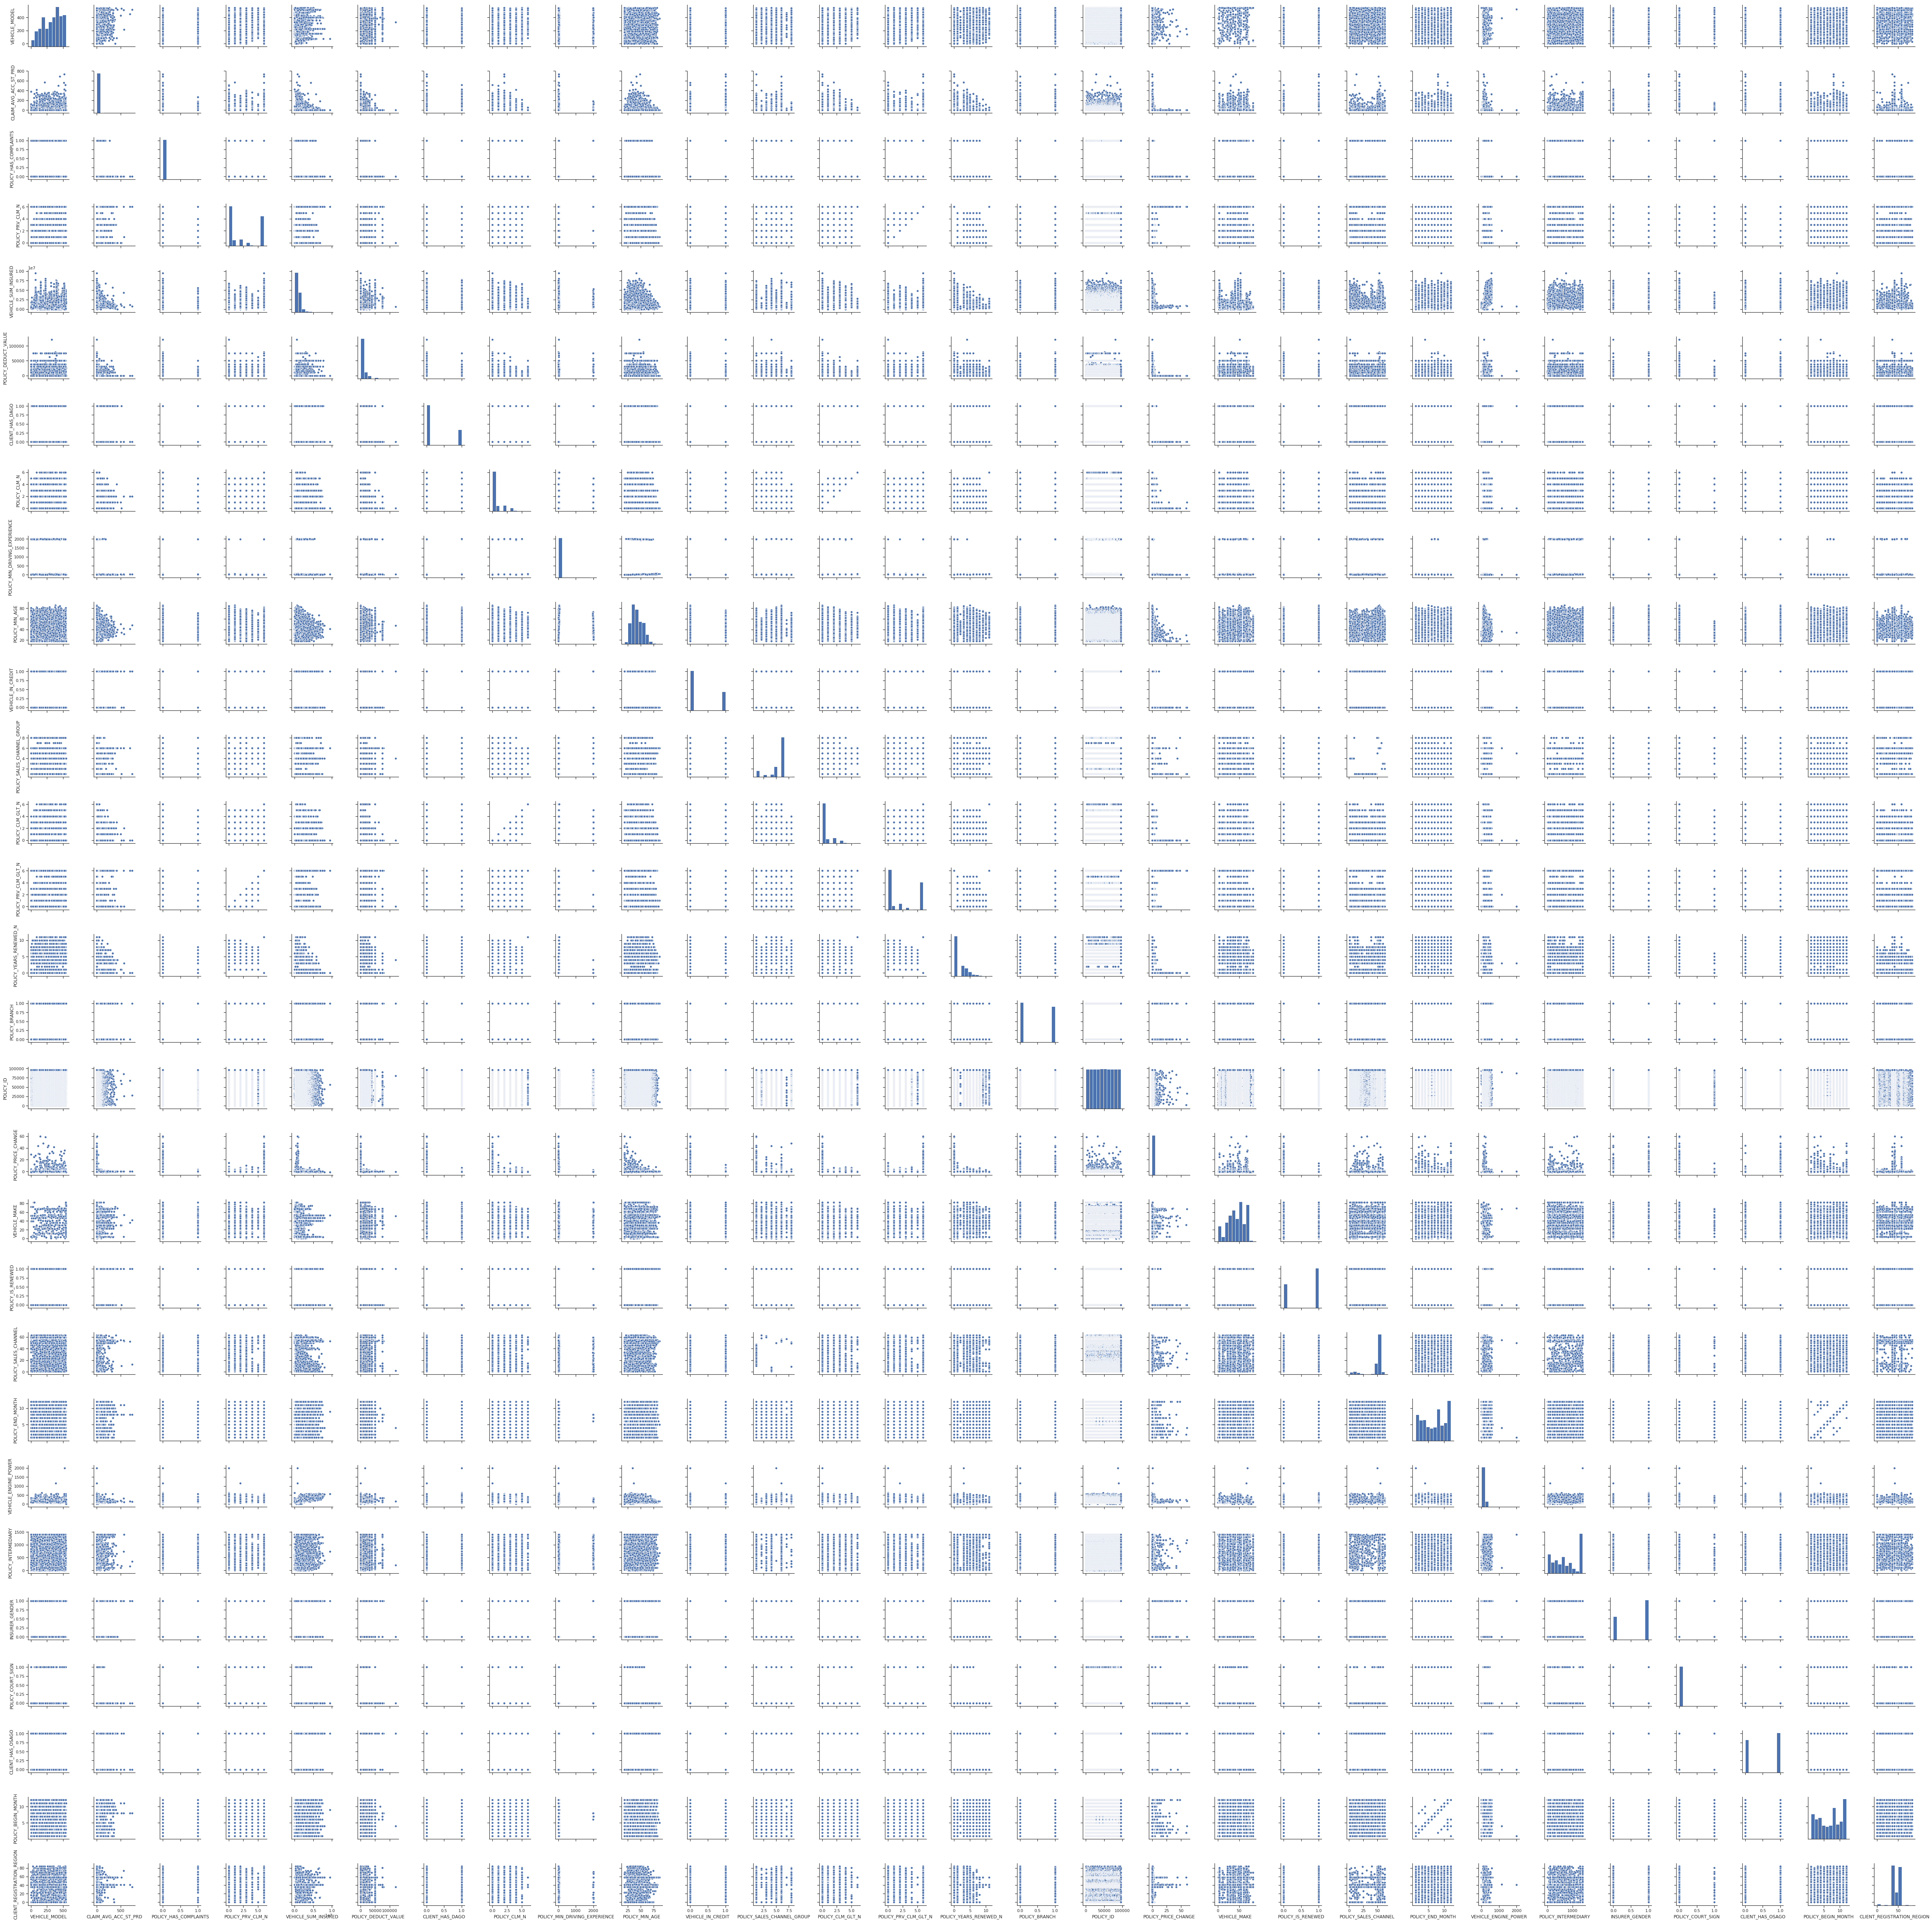

In [0]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data_corr)

# 4. Определение наиболее важных признаков

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X, y)

print(model.feature_importances_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.32885246e-02 1.15678185e-02 1.33445680e-02 ... 1.50552212e-05
 1.42601068e-05 4.55968487e-02]


In [0]:
# Вывод наиболее значимых признаков
k_top = 50
ind = np.argpartition(model.feature_importances_, -k_top)[-k_top:]
index_important_columns = ind[np.argsort(model.feature_importances_[ind])]
all_columns[index_important_columns][::-1]

Index(['POLICY_INTERMEDIARY_514', 'VEHICLE_MODEL_1119 Kalina',
       'POLICY_INTERMEDIARY_512', 'CLIENT_REGISTRATION_REGION_Чукотский',
       'POLICY_INTERMEDIARY_513', 'VEHICLE_MODEL_11183 Kalina',
       'VEHICLE_MAKE_Volvo', 'POLICY_INTERMEDIARY_540',
       'VEHICLE_MODEL_1118 Kalina', 'POLICY_INTERMEDIARY_528',
       'POLICY_INTERMEDIARY_541', 'POLICY_BEGIN_MONTH', 'DATA_TYPE',
       'POLICY_INTERMEDIARY_529', 'VEHICLE_MAKE_Volkswagen',
       'VEHICLE_MAKE_Toyota', 'POLICY_ID', 'POLICY_INTERMEDIARY_511',
       'VEHICLE_MAKE_Купава', 'VEHICLE_MAKE_ВАЗ', 'POLICY_INTERMEDIARY_530',
       'POLICY_INTERMEDIARY_532', 'VEHICLE_MAKE_Ford',
       'VEHICLE_MAKE_Land Rover', 'POLICY_INTERMEDIARY_520',
       'POLICY_INTERMEDIARY_515', 'POLICY_INTERMEDIARY_521',
       'POLICY_INTERMEDIARY_533', 'VEHICLE_MAKE_Geely',
       'VEHICLE_MAKE_Другая марка (Отечественного производства)',
       'VEHICLE_MODEL_Breez', 'POLICY_INTERMEDIARY_575',
       'POLICY_INTERMEDIARY_53', 'POLICY_INTERM

In [0]:
from sklearn.linear_model import LogisticRegression


clf2 = LogisticRegression(penalty='l1')
clf2.fit(X_train, y_train)
a = list(np.where(clf2.coef_ == 0)[1])
low_priority_feauters = [columns_features[i] for i in a]
low_priority_feauters # Признаки, которые обнулились при Lasso

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['CLIENT_REGISTRATION_REGION_Адыгея',
 'CLIENT_REGISTRATION_REGION_Алтай',
 'CLIENT_REGISTRATION_REGION_Алтайский',
 'CLIENT_REGISTRATION_REGION_Амурская',
 'CLIENT_REGISTRATION_REGION_Астраханская',
 'CLIENT_REGISTRATION_REGION_Бурятия',
 'CLIENT_REGISTRATION_REGION_Волгоградская',
 'CLIENT_REGISTRATION_REGION_Вологодская',
 'CLIENT_REGISTRATION_REGION_Забайкальский',
 'CLIENT_REGISTRATION_REGION_Ивановская',
 'CLIENT_REGISTRATION_REGION_Ингушетия',
 'CLIENT_REGISTRATION_REGION_Кабардино-Балкарская',
 'CLIENT_REGISTRATION_REGION_Камчатский',
 'CLIENT_REGISTRATION_REGION_Карачаево-Черкесская',
 'CLIENT_REGISTRATION_REGION_Карелия',
 'CLIENT_REGISTRATION_REGION_Кемеровская',
 'CLIENT_REGISTRATION_REGION_Костромская',
 'CLIENT_REGISTRATION_REGION_Крым',
 'CLIENT_REGISTRATION_REGION_Курганская',
 'CLIENT_REGISTRATION_REGION_Липецкая',
 'CLIENT_REGISTRATION_REGION_Магаданская',
 'CLIENT_REGISTRATION_REGION_Мурманская',
 'CLIENT_REGISTRATION_REGION_Ненецкий',
 'CLIENT_REGISTRATION_REGION_Пе

## Количественные признаки + 1 категориальный по очереди

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

scoring = ['precision_macro', 'recall_macro', 'accuracy']

In [51]:
df = pd.read_csv('data_ren.csv', sep=';') # Считывание даты
df.drop(columns='Unnamed: 0', inplace=True)

df['DATA_TYPE'] = df['DATA_TYPE'].apply(lambda x: x.strip(' ')) # Убираем пробел в конце для 'TEST '


data_transoform = df.copy()
list_columns_dummies = []
#list_columns = set(df.columns) - set(['DATA_TYPE'])
list_columns = list(df.columns)
list_columns.remove('DATA_TYPE')  # Cписок названий всех столбцов

for name_column in list_columns:
    if not isinstance(df.loc[0, name_column], np.int64) and not isinstance(df.loc[0, name_column], np.float64):
        list_columns_dummies.append(name_column) # список названий столбцов с категориальными признаками

for column_dummies in list_columns_dummies:
    
    data_transoform = df.copy()
    list_column_current = set(df.columns) - (set(list_columns_dummies) - set([column_dummies]))
    data_transoform = data_transoform[list_column_current]
    data_transoform = pd.get_dummies(data_transoform, columns=[column_dummies]) # все категориальные признаки представили в булеановом виде


    data_train = data_transoform[data_transoform['DATA_TYPE'] == 'TRAIN']         # equal to df.loc[df.DATA_TYPE == 'TRAIN']
    data_test = data_transoform[data_transoform['DATA_TYPE'] == 'TEST']

    all_columns = data_transoform.columns
    del data_transoform

    columns_features = list(set(all_columns) - set(['POLICY_IS_RENEWED', 'DATA_TYPE']))
    columns_features.sort()

    X = data_train[columns_features]
    y = np.array(data_train['POLICY_IS_RENEWED'])

    del data_train

    X = np.array(X)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    X_test_final = np.array(data_test[columns_features]) # Данные для финального теста
    y_test_final = np.array(data_test['POLICY_IS_RENEWED'])

    del data_test

    model = xgb.XGBClassifier(booster='gbtree', max_depth=3, learning_rate=0.3, n_jobs=4, reg_alpha=1, reg_lambda=0)
    model.fit(X_train, y_train)
    y_pred1_proba = model.predict_proba(X_test)
    y_pred1 = model.predict(X_test)
    print('Точность XGBoost раvна accuracy= {}, feature={}'.format(accuracy_score(y_pred1, y_test), column_dummies))



    clf3 = RandomForestClassifier(n_estimators=150, max_depth=40, random_state=0)
    clf3.fit(X_train, y_train)
    y_pred3 = clf3.predict(X_test)
    y_pred3_proba =  clf3.predict_proba(X_test) 
    print('Точность Random Forest раvна accuracy= {}'.format(accuracy_score(y_pred3, y_test), column_dummies))

Точность XGBoost раvна accuracy= 0.7047539077638548, feature=POLICY_BRANCH
Точность Random Forest раvна accuracy= 0.695000645911381
Точность XGBoost раvна accuracy= 0.7045601343495672, feature=VEHICLE_MAKE
Точность Random Forest раvна accuracy= 0.6966154243637773
Точность XGBoost раvна accuracy= 0.6905438573827671, feature=VEHICLE_MODEL
Точность Random Forest раvна accuracy= 0.6818886448779228
Точность XGBoost раvна accuracy= 0.7044955432114713, feature=POLICY_INTERMEDIARY
Точность Random Forest раvна accuracy= 0.6829866942255522
Точность XGBoost раvна accuracy= 0.6968737889161607, feature=INSURER_GENDER
Точность Random Forest раvна accuracy= 0.6893166257589459
Точность XGBoost раvна accuracy= 0.6986177496447488, feature=POLICY_CLM_N
Точность Random Forest раvна accuracy= 0.6924815915256427
Точность XGBoost раvна accuracy= 0.695000645911381, feature=POLICY_CLM_GLT_N
Точность Random Forest раvна accuracy= 0.6917064978684925
Точность XGBoost раvна accuracy= 0.709921198811523, feature=POL

## 1 признак варьируем по очереди

In [55]:
df = pd.read_csv('data_ren.csv', sep=';') # Считывание даты
df.drop(columns='Unnamed: 0', inplace=True)


df['DATA_TYPE'] = df['DATA_TYPE'].apply(lambda x: x.strip(' ')) # Убираем пробел в конце для 'TEST '
df.loc[:, 'Date_Diff'] = list(df['POLICY_END_MONTH'] - df['POLICY_BEGIN_MONTH']) # Столбец разницы дат окончания и начала полисов

data_transoform = df.copy()
list_columns_dummies = []
#list_columns = set(df.columns) - set(['DATA_TYPE'])
list_accuracy_xg = []
list_columns = list(df.columns)
list_columns.remove('DATA_TYPE')
list_columns.remove('POLICY_IS_RENEWED')

for name_column in list_columns:
    data_transoform = df.copy()
    data_transoform = data_transoform[['DATA_TYPE', 'POLICY_IS_RENEWED', name_column]]
    
  
  
    if not isinstance(df.loc[0, name_column], np.int64) and not isinstance(df.loc[0, name_column], np.float64):
        data_transoform = pd.get_dummies(data_transoform, columns=[name_column]) # все категориальные признаки представили в булеановом виде
        



    data_train = data_transoform[data_transoform['DATA_TYPE'] == 'TRAIN']         # equal to df.loc[df.DATA_TYPE == 'TRAIN']
    data_test = data_transoform[data_transoform['DATA_TYPE'] == 'TEST']

    all_columns = data_transoform.columns
    del data_transoform

    columns_features = list(set(all_columns) - set(['POLICY_IS_RENEWED', 'DATA_TYPE']))
    columns_features.sort()

    X = data_train[columns_features]
    y = np.array(data_train['POLICY_IS_RENEWED'])

    del data_train

    X = np.array(X)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    X_test_final = np.array(data_test[columns_features]) # Данные для финального теста
    y_test_final = np.array(data_test['POLICY_IS_RENEWED'])

    del data_test

    model = xgb.XGBClassifier(booster='gbtree', max_depth=3, learning_rate=0.3, n_jobs=4, reg_alpha=1, reg_lambda=0)
    model.fit(X_train, y_train)
    y_pred1_proba = model.predict_proba(X_test)
    y_pred1 = model.predict(X_test)
    list_accuracy_xg.append(round(accuracy_score(y_pred1, y_test), 3))
    print('Точность XGBoost раvна accuracy= {}, feature={}'.format(accuracy_score(y_pred1, y_test), name_column))



    clf3 = RandomForestClassifier(n_estimators=150, max_depth=40, random_state=0)
    clf3.fit(X_train, y_train)
    y_pred3 = clf3.predict(X_test)
    y_pred3_proba =  clf3.predict_proba(X_test) 
    print('Точность Random Forest раvна accuracy= {}'.format(accuracy_score(y_pred3, y_test), name_column))

Точность XGBoost раvна accuracy= 0.6224647978297377, feature=POLICY_ID
Точность Random Forest раvна accuracy= 0.5776385479912156
Точность XGBoost раvна accuracy= 0.6283425913964604, feature=POLICY_BEGIN_MONTH
Точность Random Forest раvна accuracy= 0.6283425913964604
Точность XGBoost раvна accuracy= 0.6295698230202816, feature=POLICY_END_MONTH
Точность Random Forest раvна accuracy= 0.6295698230202816
Точность XGBoost раvна accuracy= 0.6248546699392843, feature=POLICY_SALES_CHANNEL
Точность Random Forest раvна accuracy= 0.6243379408345175
Точность XGBoost раvна accuracy= 0.6296990052964733, feature=POLICY_SALES_CHANNEL_GROUP
Точность Random Forest раvна accuracy= 0.6296990052964733
Точность XGBoost раvна accuracy= 0.623692029453559, feature=POLICY_BRANCH
Точность Random Forest раvна accuracy= 0.623692029453559
Точность XGBoost раvна accuracy= 0.6235628471773673, feature=POLICY_MIN_AGE
Точность Random Forest раvна accuracy= 0.623692029453559
Точность XGBoost раvна accuracy= 0.624854669939

In [62]:
from collections import OrderedDict
from operator import itemgetter

dicts_acc = dict(zip(list_columns, list_accuracy_xg))
sorted_dicts = OrderedDict(sorted(dicts_acc.items(), key=itemgetter(1), reverse=True))
sorted_dicts

OrderedDict([('POLICY_PRICE_CHANGE', 0.668),
             ('POLICY_CLM_GLT_N', 0.648),
             ('POLICY_CLM_N', 0.645),
             ('POLICY_INTERMEDIARY', 0.633),
             ('POLICY_PRV_CLM_GLT_N', 0.633),
             ('CLAIM_AVG_ACC_ST_PRD', 0.633),
             ('POLICY_END_MONTH', 0.63),
             ('POLICY_SALES_CHANNEL_GROUP', 0.63),
             ('CLIENT_HAS_DAGO', 0.63),
             ('POLICY_BEGIN_MONTH', 0.628),
             ('VEHICLE_MAKE', 0.628),
             ('VEHICLE_MODEL', 0.628),
             ('CLIENT_HAS_OSAGO', 0.628),
             ('Date_Diff', 0.628),
             ('POLICY_COURT_SIGN', 0.626),
             ('POLICY_DEDUCT_VALUE', 0.626),
             ('CLIENT_REGISTRATION_REGION', 0.626),
             ('POLICY_SALES_CHANNEL', 0.625),
             ('POLICY_MIN_DRIVING_EXPERIENCE', 0.625),
             ('INSURER_GENDER', 0.625),
             ('POLICY_BRANCH', 0.624),
             ('POLICY_MIN_AGE', 0.624),
             ('POLICY_YEARS_RENEWED_N', 0.624),


# 5. Поиск наилучшего алгоритма

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

scoring = ['accuracy']

## 5.1 XGBoost

In [108]:
import xgboost as xgb

model = xgb.XGBClassifier(booster='gbtree', max_depth=3, learning_rate=0.3, n_jobs=4, reg_alpha=0, reg_lambda=1)
model.fit(X_train, y_train)
y_pred1_proba = model.predict_proba(X_test)
y_pred1 = model.predict(X_test)
print('Точность XGBoost раvна accuracy= {}'.format(accuracy_score(y_pred1, y_test)))

Точность XGBoost раvна accuracy= 0.7195452783878052


In [0]:
score1 = cross_validate(model, X, y, scoring=scoring, cv=5)

In [117]:
print('Точность XGBoost на кросс vалидации cv=5, accuracy={}'.format(score1['test_accuracy'].mean()))

Точность XGBoost на кросс vалидации cv=5, accuracy=0.7145995768917472


In [118]:
score1['test_accuracy']

array([0.70987535, 0.7175893 , 0.71771849, 0.7149409 , 0.71287385])

## 5.2 Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression


clf2 = LogisticRegression(penalty='l1')
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print('Точность Logitic Regression раvна accuracy= {}'.format(accuracy_score(y_pred2, y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность Logitic Regression раvна accuracy= 0.6773026740731172


In [114]:
score2 = cross_validate(clf2, X, y, scoring=scoring, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [111]:
print('Точность Logistic Regression на кросс vалидации cv=5, accuracy={}'.format(score2['test_accuracy'].mean()))

Точность Logistic Regression на кросс vалидации cv=5, accuracy=0.6744352325376729


In [112]:
score2['test_accuracy']

array([0.67041271, 0.67663588, 0.67314773, 0.68018862, 0.67179123])

## 5.3 Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=0)
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
y_pred3_proba =  clf3.predict_proba(X_test) 
print('Точность Random Forest раvна accuracy= {}'.format(accuracy_score(y_pred3, y_test)))

Точность Random Forest раvна accuracy= 0.696292468673298


In [0]:
score3 = cross_validate(clf3, X, y, scoring=scoring, cv=5)
print('Точность Random Forest на кросс vалидации cv=5, accuracy={}'.format(score3['test_accuracy'].mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Точность Random Forest на кросс vалидации cv=5, accuracy=0.6282636795171783


## 5.4 Neural Network

In [0]:
import torch

device = torch.device('cuda:0'
                     if torch.cuda.is_available()
                     else 'cpu')

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [0]:


class ClassifierNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2184, 1024)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(1024, 512)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(512, 512)
        self.act3 = torch.nn.Sigmoid()
        self.fc4 = torch.nn.Linear(512, 10)
        self.act_final = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x
      
    def predict(self, x):
        x = forward(x)
        x = self.act_final(x)
        return x

net = ClassifierNet()

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

n_epochs = 100
batch_size = 100

In [0]:
from tqdm import tqdm
for epoch in tqdm(range(0, n_epochs)):
 
    optimizer.zero_grad()

    preds = net.forward(X_train)
    loss_val = loss(preds, y_train)

    loss_val.backward()
    optimizer.step()

    if epoch % 20 == 0:
        train_preds = net.forward(X_train)
        train_preds = train_preds.argmax(dim=1)

        test_preds = net.forward(X_test)
        test_preds = test_preds.argmax(dim=1)

        print('\n На эпохе ', epoch, 'на обучающей выборке accuracy =', (train_preds == y_train).float().mean())
        print('На эпохе ', epoch, 'на тестовой выборке accuracy =', (test_preds == y_test).float().mean())


    
    



  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:05<09:45,  5.92s/it]


 На эпохе  0 на обучающей выборке accuracy = tensor(0.6248)
На эпохе  0 на тестовой выборке accuracy = tensor(0.6256)




  2%|▏         | 2/100 [00:09<08:41,  5.32s/it]

  3%|▎         | 3/100 [00:13<07:55,  4.90s/it]

  4%|▍         | 4/100 [00:17<07:23,  4.62s/it]

  5%|▌         | 5/100 [00:22<07:12,  4.56s/it]

  6%|▌         | 6/100 [00:26<07:03,  4.50s/it]

  7%|▋         | 7/100 [00:30<06:53,  4.45s/it]

  8%|▊         | 8/100 [00:35<06:44,  4.40s/it]

  9%|▉         | 9/100 [00:39<06:32,  4.32s/it]

 10%|█         | 10/100 [00:44<06:45,  4.51s/it]

 11%|█         | 11/100 [00:49<06:53,  4.65s/it]

 12%|█▏        | 12/100 [00:54<06:58,  4.76s/it]

 13%|█▎        | 13/100 [00:59<06:59,  4.83s/it]

 14%|█▍        | 14/100 [01:04<06:58,  4.86s/it]

 15%|█▌        | 15/100 [01:09<07:01,  4.96s/it]

 16%|█▌        | 16/100 [01:14<07:06,  5.07s/it]

 17%|█▋        | 17/100 [01:19<07:02,  5.09s/it]

 18%|█▊        | 18/100 [01:25<07:01,  5.14s/it]

 19%|█▉        | 19/100 [01:30<06:55,  5.13s/it]

 20%|██        | 20/100 [01:34<06:25,  4.82s/it]

 21%|██        | 21/100 [01:40<06:55,  5.26s/it]


 На эпохе  20 на обучающей выборке accuracy = tensor(0.6248)
На эпохе  20 на тестовой выборке accuracy = tensor(0.6256)




 22%|██▏       | 22/100 [01:44<06:25,  4.95s/it]

 23%|██▎       | 23/100 [01:48<05:59,  4.67s/it]

 24%|██▍       | 24/100 [01:52<05:38,  4.45s/it]

 25%|██▌       | 25/100 [01:56<05:22,  4.30s/it]

 26%|██▌       | 26/100 [02:00<05:13,  4.24s/it]

 27%|██▋       | 27/100 [02:04<05:05,  4.18s/it]

 28%|██▊       | 28/100 [02:08<04:55,  4.11s/it]

 29%|██▉       | 29/100 [02:12<04:47,  4.05s/it]

 30%|███       | 30/100 [02:16<04:40,  4.01s/it]

 31%|███       | 31/100 [02:20<04:33,  3.97s/it]

 32%|███▏      | 32/100 [02:24<04:28,  3.94s/it]

 33%|███▎      | 33/100 [02:28<04:25,  3.96s/it]

 34%|███▍      | 34/100 [02:32<04:21,  3.97s/it]

 35%|███▌      | 35/100 [02:36<04:17,  3.96s/it]

 36%|███▌      | 36/100 [02:40<04:11,  3.92s/it]

 37%|███▋      | 37/100 [02:43<04:06,  3.91s/it]

 38%|███▊      | 38/100 [02:47<04:01,  3.90s/it]

 39%|███▉      | 39/100 [02:51<03:57,  3.89s/it]

 40%|████      | 40/100 [02:55<03:54,  3.90s/it]

 41%|████      | 41/100 [03:01<04:25,  4.50s/it]


 На эпохе  40 на обучающей выборке accuracy = tensor(0.6248)
На эпохе  40 на тестовой выборке accuracy = tensor(0.6256)




 42%|████▏     | 42/100 [03:05<04:10,  4.32s/it]

 43%|████▎     | 43/100 [03:09<03:58,  4.18s/it]

 44%|████▍     | 44/100 [03:13<03:49,  4.09s/it]

 45%|████▌     | 45/100 [03:17<03:41,  4.03s/it]

 46%|████▌     | 46/100 [03:20<03:34,  3.97s/it]

 47%|████▋     | 47/100 [03:24<03:28,  3.94s/it]

 48%|████▊     | 48/100 [03:28<03:23,  3.91s/it]

 49%|████▉     | 49/100 [03:32<03:18,  3.90s/it]

 50%|█████     | 50/100 [03:36<03:13,  3.87s/it]

 51%|█████     | 51/100 [03:40<03:09,  3.87s/it]

 52%|█████▏    | 52/100 [03:44<03:05,  3.87s/it]

 53%|█████▎    | 53/100 [03:47<03:02,  3.88s/it]

 54%|█████▍    | 54/100 [03:51<02:58,  3.89s/it]

 55%|█████▌    | 55/100 [03:55<02:55,  3.90s/it]

 56%|█████▌    | 56/100 [03:59<02:50,  3.88s/it]

 57%|█████▋    | 57/100 [04:03<02:46,  3.86s/it]

 58%|█████▊    | 58/100 [04:07<02:41,  3.86s/it]

 59%|█████▉    | 59/100 [04:11<02:37,  3.85s/it]

 60%|██████    | 60/100 [04:14<02:33,  3.84s/it]

 61%|██████    | 61/100 [04:20<02:52,  4.43s/it]


 На эпохе  60 на обучающей выборке accuracy = tensor(0.6248)
На эпохе  60 на тестовой выборке accuracy = tensor(0.6256)




 62%|██████▏   | 62/100 [04:24<02:41,  4.25s/it]

 63%|██████▎   | 63/100 [04:28<02:32,  4.13s/it]

 64%|██████▍   | 64/100 [04:32<02:25,  4.03s/it]

 65%|██████▌   | 65/100 [04:36<02:19,  3.97s/it]

 66%|██████▌   | 66/100 [04:39<02:13,  3.92s/it]

 67%|██████▋   | 67/100 [04:43<02:08,  3.88s/it]

 68%|██████▊   | 68/100 [04:47<02:03,  3.85s/it]

 69%|██████▉   | 69/100 [04:51<01:58,  3.83s/it]

 70%|███████   | 70/100 [04:54<01:54,  3.82s/it]

 71%|███████   | 71/100 [04:58<01:50,  3.83s/it]

 72%|███████▏  | 72/100 [05:02<01:47,  3.84s/it]

 73%|███████▎  | 73/100 [05:06<01:43,  3.84s/it]

 74%|███████▍  | 74/100 [05:10<01:39,  3.84s/it]

 75%|███████▌  | 75/100 [05:14<01:36,  3.85s/it]

 76%|███████▌  | 76/100 [05:18<01:32,  3.85s/it]

 77%|███████▋  | 77/100 [05:21<01:28,  3.83s/it]

 78%|███████▊  | 78/100 [05:25<01:24,  3.83s/it]

 79%|███████▉  | 79/100 [05:29<01:20,  3.82s/it]

 80%|████████  | 80/100 [05:33<01:16,  3.81s/it]

 81%|████████  | 81/100 [05:39<01:23,  4.39s/it]


 На эпохе  80 на обучающей выборке accuracy = tensor(0.6248)
На эпохе  80 на тестовой выборке accuracy = tensor(0.6256)




 82%|████████▏ | 82/100 [05:42<01:15,  4.20s/it]

 83%|████████▎ | 83/100 [05:46<01:09,  4.07s/it]

 84%|████████▍ | 84/100 [05:50<01:03,  3.98s/it]

 85%|████████▌ | 85/100 [05:54<00:58,  3.92s/it]

 86%|████████▌ | 86/100 [05:57<00:54,  3.88s/it]

 87%|████████▋ | 87/100 [06:01<00:50,  3.87s/it]

 88%|████████▊ | 88/100 [06:05<00:46,  3.87s/it]

 89%|████████▉ | 89/100 [06:09<00:42,  3.84s/it]

 90%|█████████ | 90/100 [06:13<00:39,  3.90s/it]

 91%|█████████ | 91/100 [06:17<00:36,  4.02s/it]

 92%|█████████▏| 92/100 [06:22<00:32,  4.12s/it]

 93%|█████████▎| 93/100 [06:26<00:28,  4.13s/it]

 94%|█████████▍| 94/100 [06:30<00:24,  4.08s/it]

 95%|█████████▌| 95/100 [06:34<00:20,  4.06s/it]

 96%|█████████▌| 96/100 [06:38<00:16,  4.01s/it]

 97%|█████████▋| 97/100 [06:41<00:11,  3.94s/it]

 98%|█████████▊| 98/100 [06:45<00:07,  3.91s/it]

 99%|█████████▉| 99/100 [06:49<00:03,  3.89s/it]

100%|██████████| 100/100 [06:53<00:00,  3.91s/it]



# 6. Предсказания

## В качестве предсказаний я решил взять xgboost: он показал хороший наилучшую точность на тестовой выборке и на кросс валидации

In [0]:
model = xgb.XGBClassifier(booster='gbtree', max_depth=3, learning_rate=0.3, n_jobs=4, reg_alpha=1, reg_lambda=0)
model.fit(X, y)
y_pred_proba = model.predict_proba(X_test_final)
y_pred = model.predict(X_test_final)

a = np.array([list(list_id), y_pred, y_pred_proba[:, 1]])
a = a.T
data_final = pd.DataFrame(a, columns=['POLICY_ID', 'POLICY_IS_RENEWED', 'POLICY_IS_RENEWED_PROBABILITY}'])

In [192]:
from google.colab import drive
drive.mount('drive')


data_final.to_csv('data_final.csv')
!cp data_final.csv drive/My\ Drive/

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# 7 Визуалиация

In [0]:
import numpy as np
import matplotlib.pyplot as plt


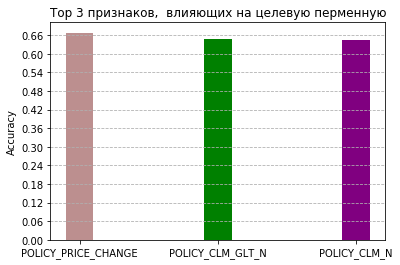

In [249]:


features = list(sorted_dicts.keys())[:3]
acc_val = list(sorted_dicts.values())[:3]
ind = np.arange(len(acc_val))
width = 0.2

p1 = plt.bar(ind, acc_val, width, color=['rosybrown', 'green', 'purple', 'red', 'gold'])


plt.ylabel('Accuracy')
plt.title('Top 3 признаков,  влияющих на целевую перменную')
plt.xticks(ind, features)
plt.yticks(np.arange(0, 0.7, 0.06))
plt.grid(linestyle='--', axis='y')
           

plt.show()




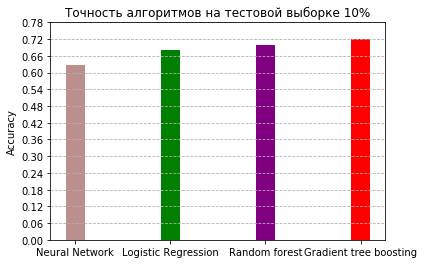

In [229]:


acc = [0.626, 0.68, 0.7, 0.720]
acc_cv = [0.674, 0.628, 0.715]
methods = ['Neural Network', 'Logistic Regression', 'Random forest', 'Gradient tree boosting']
methods2 = ['Logistic Regression', 'Random forest', 'Gradient tree boosting']
ind = np.arange(len(acc))
width = 0.2

p1 = plt.bar(ind, acc, width, color=['rosybrown', 'green', 'purple', 'red'])


plt.ylabel('Accuracy')
plt.title('Точность алгоритмов на тестовой выборке 10%')
plt.xticks(ind, methods)
plt.yticks(np.arange(0, 0.8, 0.06))
plt.grid(linestyle='--', axis='y')
           

plt.show()

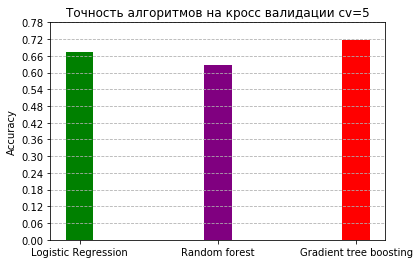

In [230]:
width = 0.2

ind = np.arange(len(acc_cv))
p1 = plt.bar(ind, acc_cv, width, color=['green', 'purple', 'red'])



plt.ylabel('Accuracy')
plt.title('Точность алгоритмов на кросс валидации cv=5')
plt.xticks(ind, methods2)
plt.yticks(np.arange(0, 0.8, 0.06))
plt.grid(linestyle='--', axis='y')
           

plt.show()